In [328]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.spatial.distance import cdist
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

<h1><center><font size=8>PART A</center></font></h1>


### **DOMAIN:** 
Automobile

### **CONTEXT:**
The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

###  **DATA DESCRIPTION:**
cylinders: multi-valued 

discrete acceleration: continuous

displacement: continuous

model year: multi-valued discrete

horsepower: continuous

origin: multi-valued discrete

weight: continuous

car name: string (unique for each instance)

### **PROJECT OBJECTIVE:**
To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

### 1. Data Understanding & Exploration:

#### A. Read ‘Car Name.csv’ as a DataFrame and assign it to a variable. 

In [329]:
# reading Car Name.csv file 

df1= pd.read_csv("Car Name.csv")

#### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. 

In [330]:
# reading Car-Attributes.json file 

df2 = pd.read_json("Car-Attributes.json")

#### C. Merge both the DataFrames together to form a single DataFrame

In [331]:
df = pd.concat([df1,df2],axis=1)

In [332]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


#### D. Print 5 point summary of the numerical features and share insights.

In [333]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


Fuel Efficiency (MPG): On average, cars achieve around 23.51 miles per gallon (MPG), with a deviation of 7.82. MPG ranges from 9.0 to 46.6. Approximately a quarter of cars have an MPG of 17.5 or lower, while three-quarters have an MPG of 29.0 or lower.

Engine Cylinders: The average number of cylinders is approximately 5.45, with a deviation of 1.70. The number of cylinders varies from 3 to 8. Half of the cars have 4 cylinders, while a quarter have 3 cylinders or fewer, and three-quarters have 8 cylinders or fewer.

Engine Displacement: The average displacement is about 193.43 cubic inches, with a deviation of 104.27. Displacement ranges from 68 to 455 cubic inches. Half of the cars have a displacement of 148.5 or lower.

Car Weight: The average weight is approximately 2970.42 pounds, with a deviation of 846.84. Weight ranges from 1613 to 5140 pounds. Half of the cars weigh 2803.5 pounds or less.

Acceleration: The average acceleration time is around 15.57 seconds, with a deviation of 2.76. Acceleration times range from 8.0 to 24.8 seconds. Approximately a quarter of cars have an acceleration time of 13.83 seconds or lower, and three-quarters have an acceleration time of 17.18 seconds or lower.

Manufacturing Year: The average year is about 76.01, with a deviation of 3.70. Years span from 1970 to 1982. The majority of cars were manufactured between 1973 and 1979.

Origin: The average origin value is roughly 1.57, with a deviation of 0.80. Origin values vary from 1 to 3. Most cars have an origin value of 1.

### 2. Data Preparation & Analysis: 

#### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [334]:
# Print the feature-wise percentage of null values

df.isnull().sum() / len(df) * 100

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

We can see no missing values are found

#### B. Check for duplicate values in the data and impute with the best suitable approach.

In [335]:
# Check for the duplicate values
df.duplicated().sum()

0

#### C. Plot a pairplot for all features. 

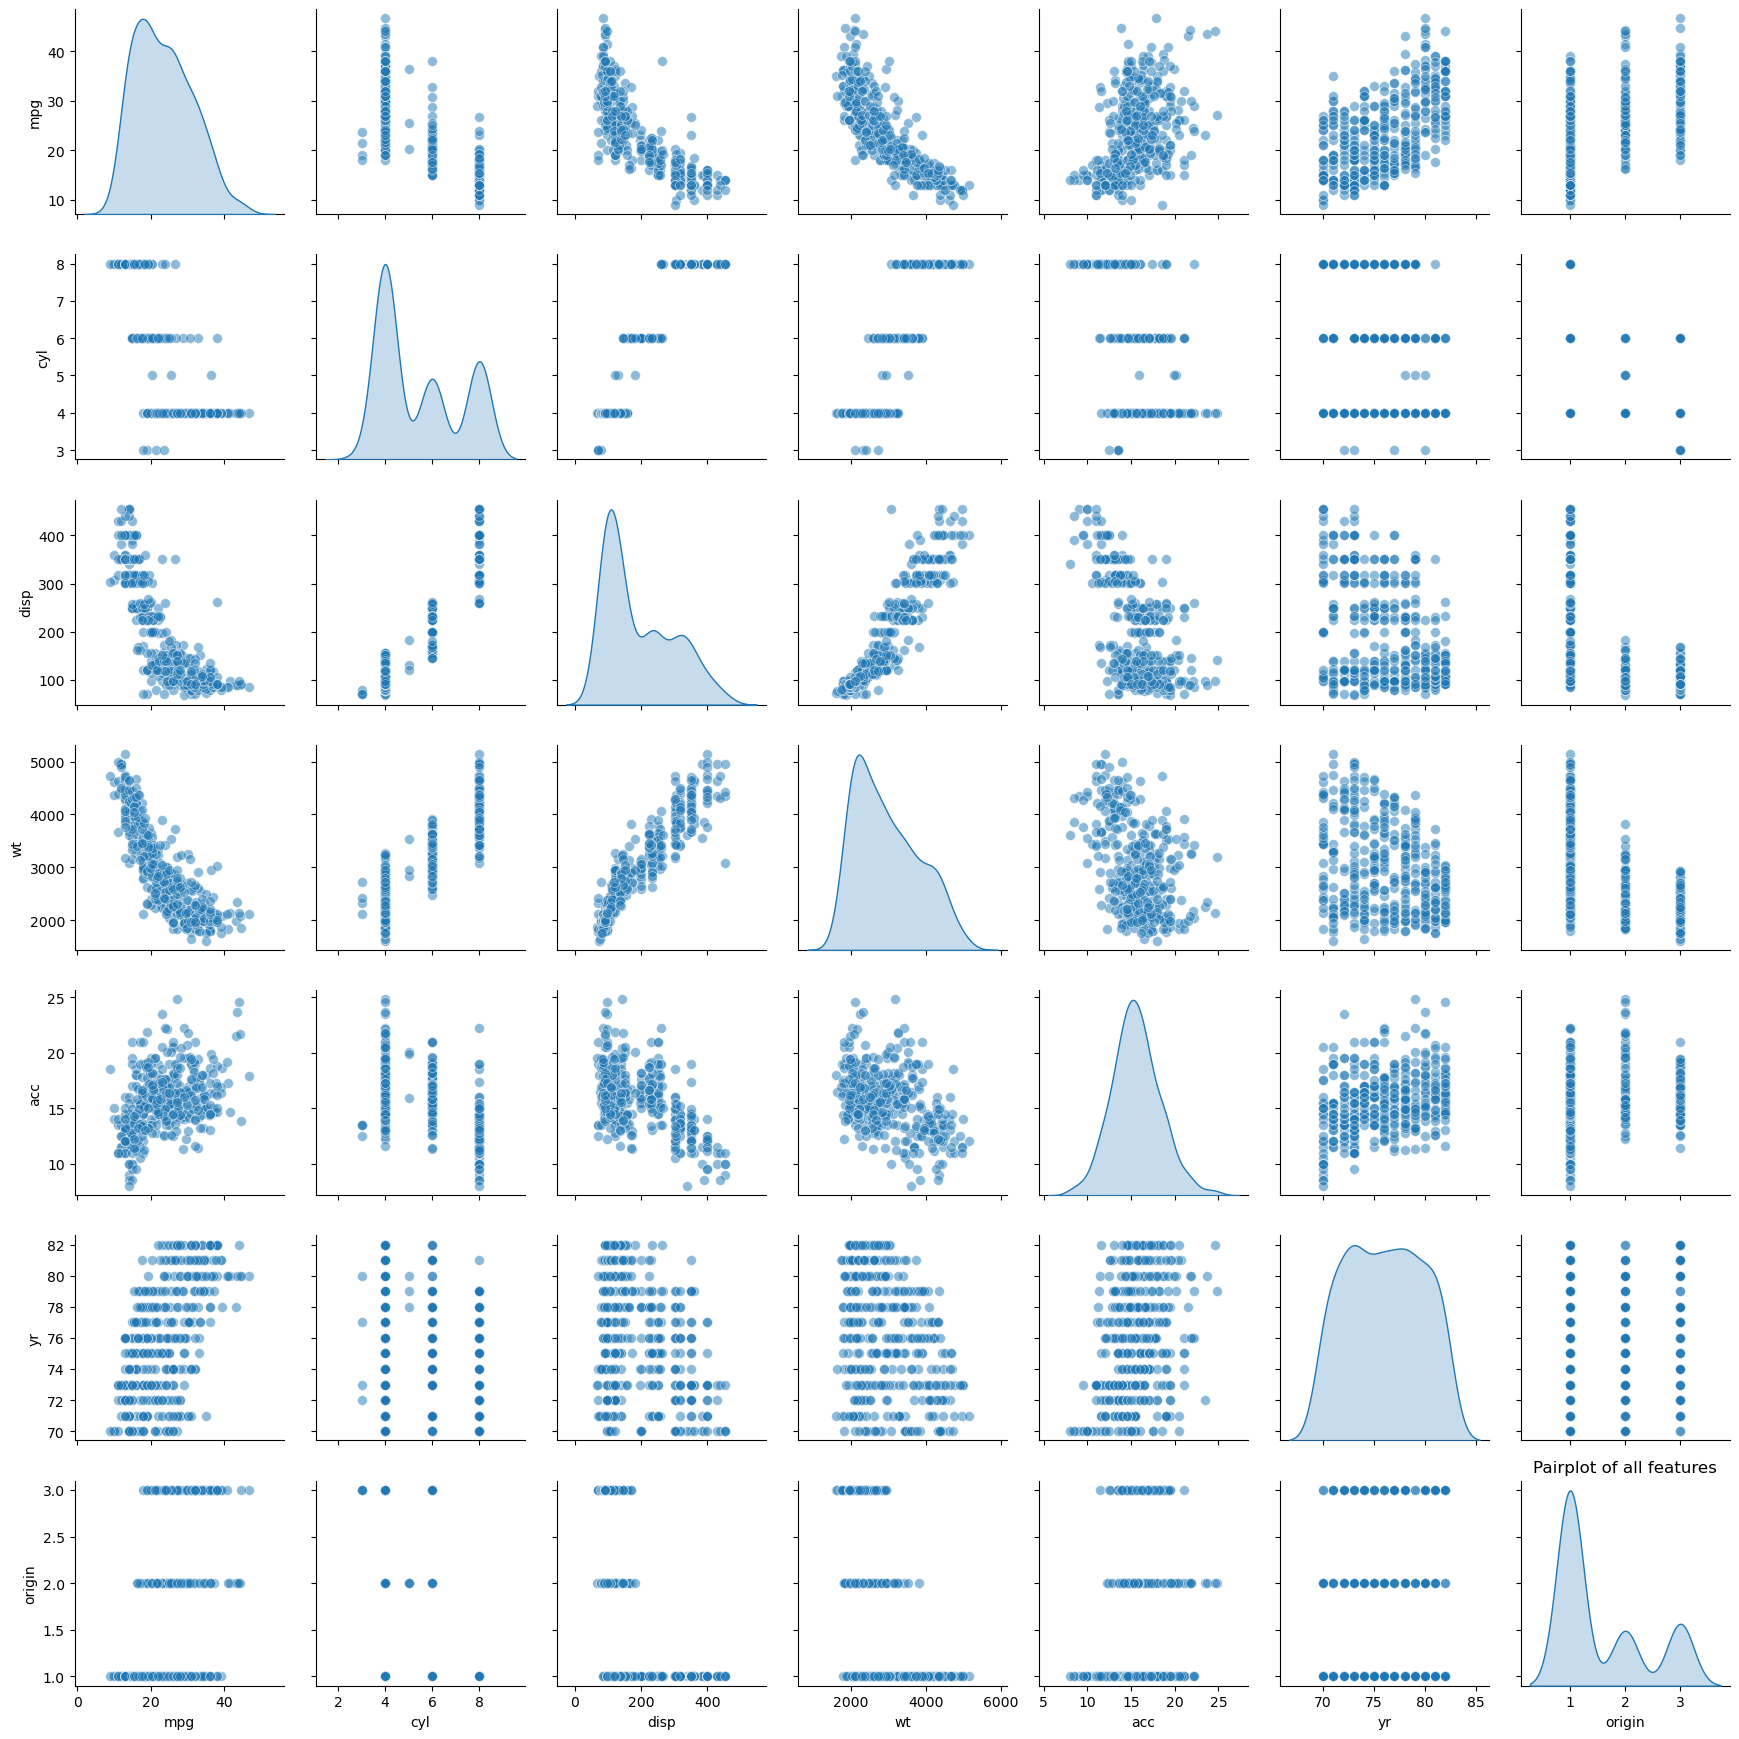

In [336]:
sns.pairplot(df, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5, 's': 50})
plt.title('Pairplot of all features')
plt.tight_layout()
plt.show()

#### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

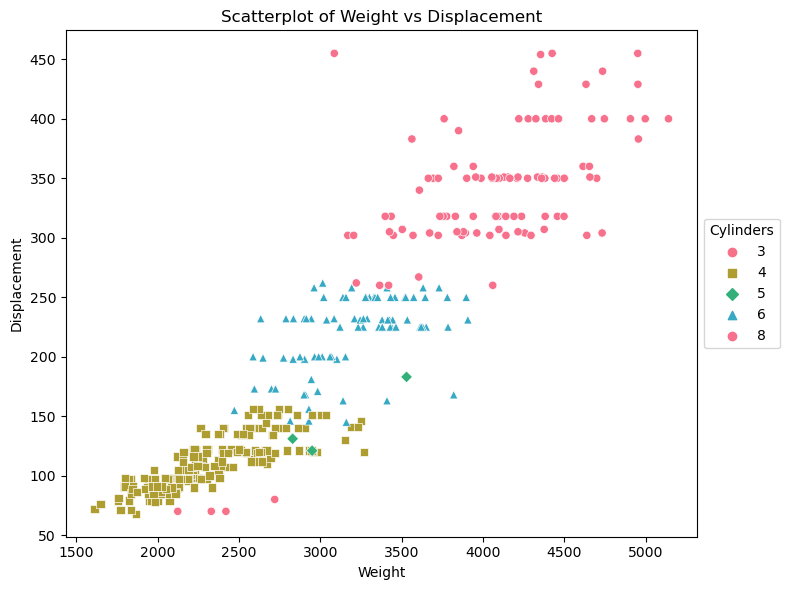

In [337]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='wt', y='disp', hue='cyl', style='cyl', data=df, palette='husl', markers=['o', 's', 'D', '^'])
plt.xlabel('Weight')
plt.ylabel('Displacement')
plt.title('Scatterplot of Weight vs Displacement')
plt.legend(title='Cylinders', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

#### E. Share insights for Q2.d.

There is a very strong positive correlation between 'wt' and 'disp', indicating that heavier cars tend to have larger displacements, and vice versa. This correlation suggests that as the weight of a car increases, its engine displacement also tends to increase, and conversely, lighter cars tend to have smaller engine displacements.
Additionally, there is a strong positive correlation between 'wt' and 'cyl', as well as between 'disp' and 'cyl'. This means that cars with more cylinders tend to be heavier, and cars with more cylinders tend to have larger displacements. This correlation suggests that vehicles with higher numbers of cylinders typically have larger engines and consequently weigh more.

#### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

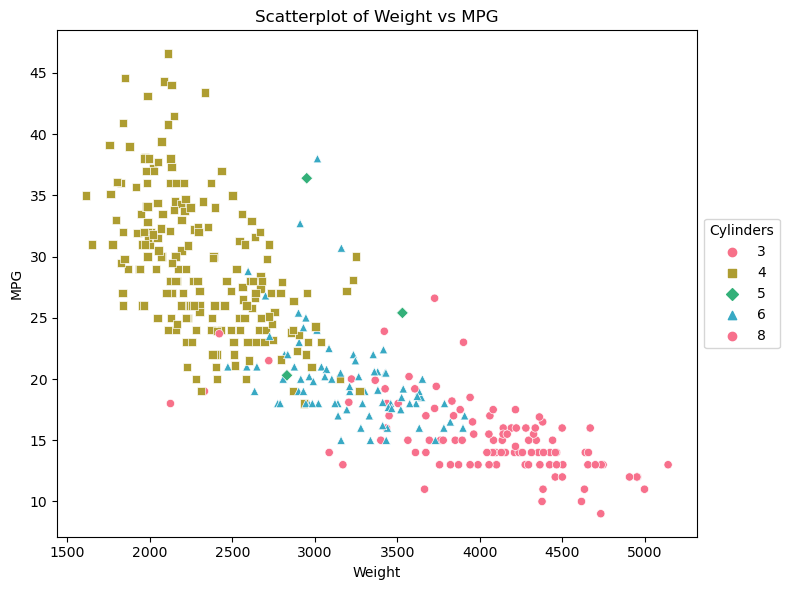

In [338]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='wt', y='mpg', hue='cyl', style='cyl', data=df, palette='husl', markers=['o', 's', 'D', '^'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Scatterplot of Weight vs MPG')
plt.legend(title='Cylinders', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

#### G. Share insights for Q2.f.

There is a very strong negative correlation between 'wt' (weight) and 'mpg' (miles per gallon), indicating that heavier cars tend to have lower miles per gallon. This correlation suggests that as the weight of a car increases, its fuel efficiency decreases, and vice versa.
There is a strong positive correlation between the weight ('wt') of a car and its number of cylinders ('cyl'). This suggests that heavier cars tend to have more cylinders, which is consistent with the general trend of larger, heavier vehicles having more powerful engines.
There is also a strong negative correlation between the number of cylinders ('cyl') and miles per gallon ('mpg'). This implies that cars with more cylinders tend to have lower fuel efficiency. This relationship is intuitive, as vehicles with larger, more powerful engines (often characterized by more cylinders) typically consume more fuel.

#### H. Check for unexpected values in all the features and datapoints with such values. 

In [339]:
unique_values = {}

for col in df.columns:
    unique_values[col] = df[col].unique()

for col, values in unique_values.items():
    print("Unique values in column '{}': {}".format(col, values))

Unique values in column 'car_name': ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket'

In [340]:
# displaying the details of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Here we can see an unexpected value '?' in the hp column

In [341]:
# replacing '?' with Nan and change the type to float

df['hp'] = df['hp'].replace(['?'],np.nan)
df['hp'] = df['hp'].astype(float)

In [342]:
# checking the percentage of null value

df.isnull().sum() / len(df) * 100

car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          1.507538
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

We are able to see the missing percentage of 1.50 ,which very less and significant , so we can drop the column

In [343]:
df.dropna(subset=['hp'], inplace=True)

In [344]:
# checking the info after droping the 'hp' column

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    float64
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


### Clustering:


In [345]:
#  before performing KMeans Clustering ,  drop columns 'car_name' and store it in new variable and then scale the new dataset using zscore.

df_car = df.drop('car_name', axis=1)
df_scaled = df_car.apply(zscore)
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,1.450087e-16,1.001278,-1.853218,-0.826925,-0.089277,0.712514,2.970359
cyl,392.0,-1.087565e-16,1.001278,-1.451004,-0.864014,-0.864014,1.483947,1.483947
disp,392.0,-7.250436e-17,1.001278,-1.209563,-0.855532,-0.415384,0.778276,2.493416
hp,392.0,-1.812609e-16,1.001278,-1.520975,-0.766593,-0.285349,0.560080,3.265452
wt,392.0,-1.812609e-17,1.001278,-1.608575,-0.886854,-0.205211,0.751093,2.549061
acc,392.0,4.350262e-16,1.001278,-2.736983,-0.641055,-0.014999,0.538471,3.360262
yr,392.0,-1.160070e-15,1.001278,-1.625315,-0.809884,0.005547,0.820978,1.636410
origin,392.0,1.359457e-16,1.001278,-0.716641,-0.716641,-0.716641,0.526382,1.769406


#### A. Apply K-Means clustering for 2 to 10 clusters

In [346]:
k_values = range(2, 11)
inertia_values = []

# Iterate over each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

#### B. Plot a visual and find elbow point. 

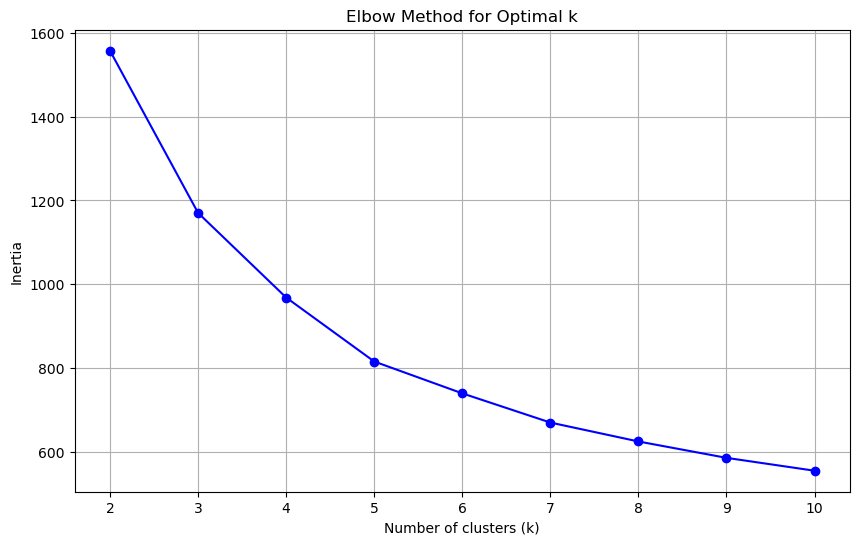

In [347]:
# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### C. On the above visual, highlight which are the possible Elbow points.

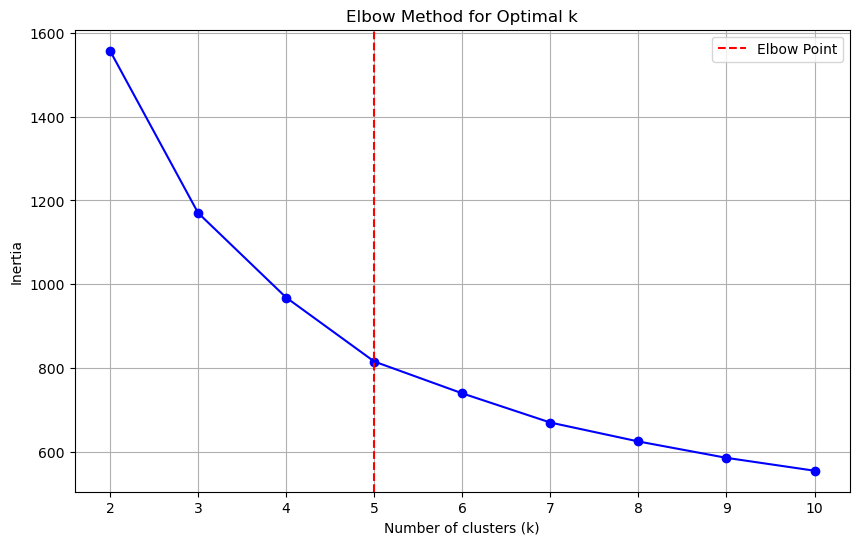

In [348]:
# Highlight the elbow point
plt.figure(figsize=(10,6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
kl = KneeLocator(k_values, inertia_values, curve='convex', direction='decreasing')
plt.axvline(x=kl.elbow, color='r', linestyle='--', label='Elbow Point')
plt.legend()
plt.show()

#### D. Train a K-means clustering model once again on the optimal number of clusters.

In [349]:
# Train on k=5 

opt_model=KMeans(5) 
opt_model.fit(df_scaled)
prediction=opt_model.predict(df_scaled)

#### E. Add a new feature in the DataFrame which will have labels based upon cluster value.

In [350]:
df["Cluster"] = prediction
df_scaled["Cluster"] = prediction
df.sample(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Cluster
277,peugeot 604sl,16.2,6,163.0,133.0,3410,15.8,78,2,3
70,chrysler newport royal,13.0,8,400.0,190.0,4422,12.5,72,1,1
195,chevrolet chevette,29.0,4,85.0,52.0,2035,22.2,76,1,0
143,opel manta,26.0,4,97.0,78.0,2300,14.5,74,2,2
234,pontiac sunbird coupe,24.5,4,151.0,88.0,2740,16.0,77,1,0
131,toyota corolla 1200,32.0,4,71.0,65.0,1836,21.0,74,3,4
21,audi 100 ls,24.0,4,107.0,90.0,2430,14.5,70,2,2
87,chevrolet malibu,13.0,8,350.0,145.0,3988,13.0,73,1,1
350,plymouth horizon 4,34.7,4,105.0,63.0,2215,14.9,81,1,0
186,renault 12tl,27.0,4,101.0,83.0,2202,15.3,76,2,2


#### F. Plot a visual and color the datapoints based upon clusters. 

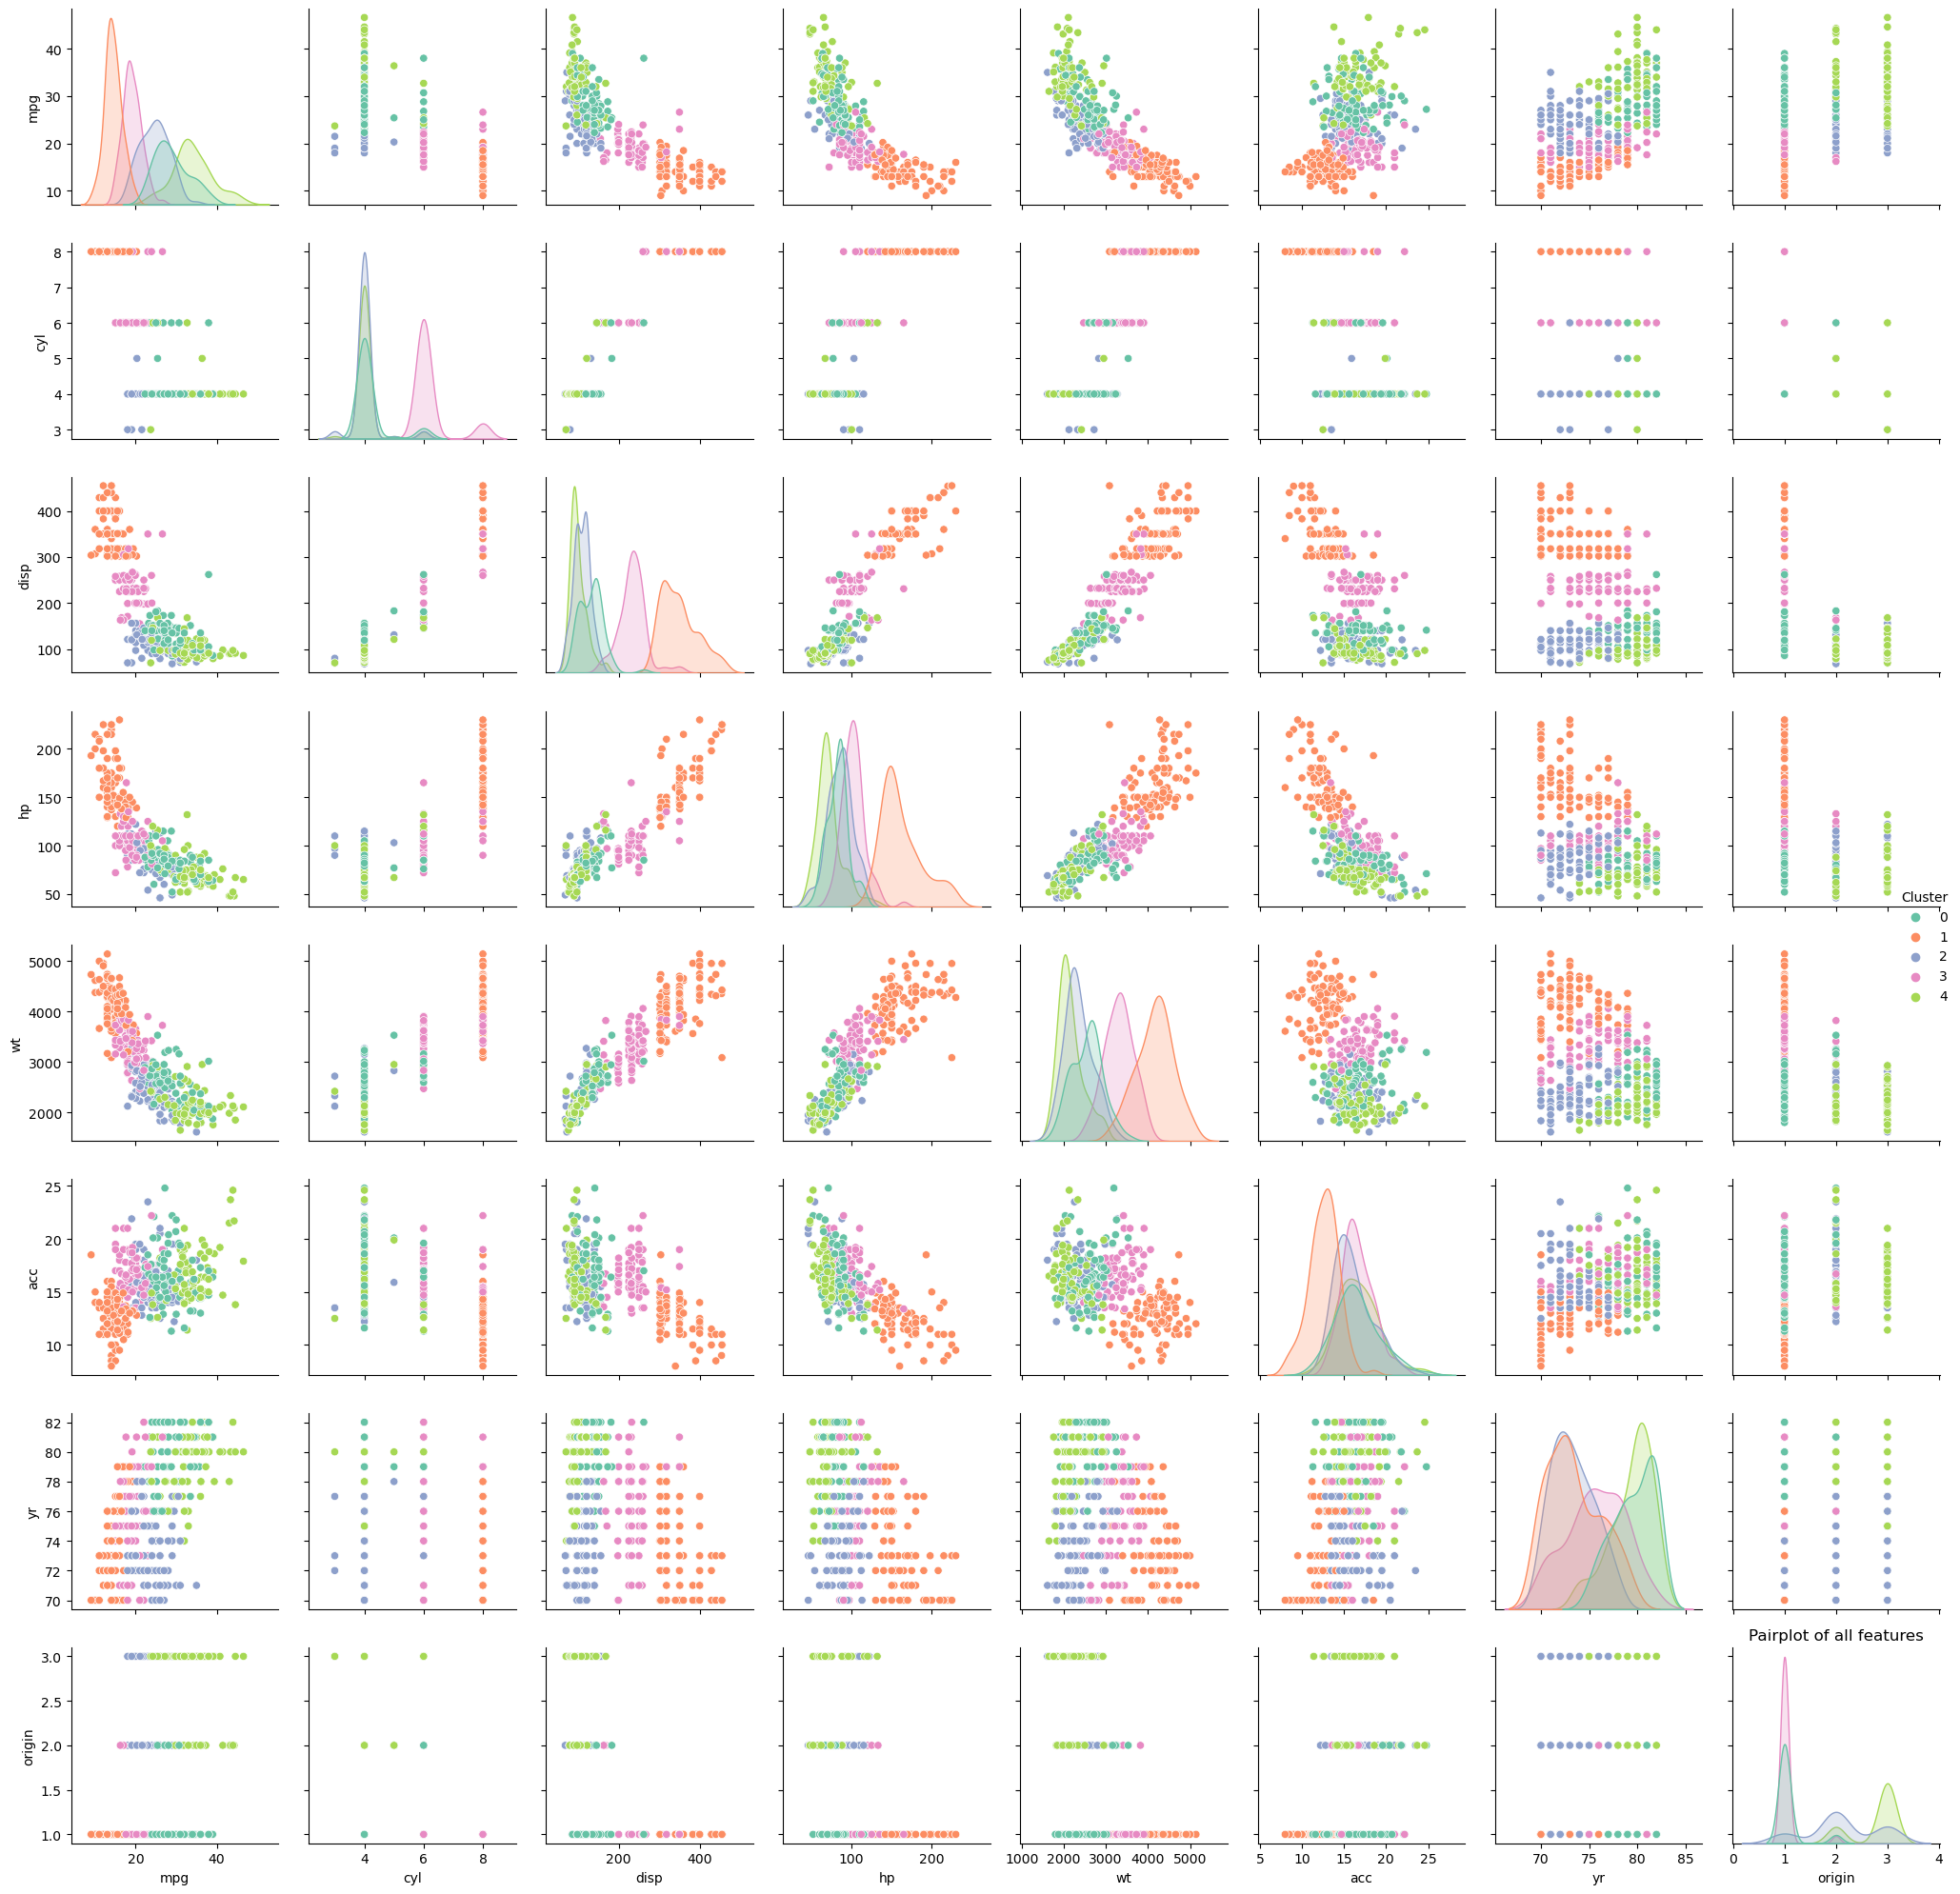

In [351]:
sns.pairplot(df, diag_kind="kde", hue='Cluster', palette='Set2');
plt.title('Pairplot of all features')
plt.tight_layout()
plt.show()

#### G. Pass a new DataPoint and predict which cluster it belongs to

In [352]:
# Create a synthetic data point 
new_data = {'mpg': 25.0, 'cyl': 6, 'disp': 200.0, 'hp': 110.0, 'wt': 3200, 'acc': 15.5, 'yr': 78, 'origin': 1}

# Convert to DataFrame
new_df = pd.DataFrame([new_data])

# Scale the synthetic data point using the same scaling parameters 
scaled_new_df = (new_df - df_car.mean()) / df_car.std()

# Train K-means clustering model with the optimal number of clusters
cols = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled[cols]) 

# Predict the cluster for the synthetic data point
predicted_cluster = kmeans.predict(scaled_new_df[cols])

print("Predicted Cluster:", predicted_cluster[0])

Predicted Cluster: 1


<h1><center><font size=8>PART B</center></font></h1>


### **DOMAIN:** 
Automobile

### **CONTEXT:**
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
vehicle may be viewed from one of many different angles.
###  **DATA DESCRIPTION:**
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were
used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles
was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to
distinguish between the cars.

• All the features are numeric i.e. geometric features extracted from the silhouette

### **PROJECT OBJECTIVE:**
Apply dimensionality reduction technique – PCA and train a model and compare relative results

### 1. Data Understanding & Cleaning:

#### A. Read ‘vehicle.csv’ and save as DataFrame. 

In [353]:
# loading the dataset

df = pd.read_csv("vehicle.csv")

In [354]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


#### B. Check percentage of missing values and impute with correct approach. 

In [355]:
df.isnull().sum() / len(df) * 100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

Imputing the missing values with the mean or median would be reasonable choices but we will go with Median Imputation method as it is more robust in the presence of outliers.

In [356]:
missing_cols = [
    'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio',
    'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance',
    'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
    'skewness_about', 'skewness_about.1', 'skewness_about.2'
]
df.groupby(['class'])[missing_cols].median()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
class,,,,,,,,,,,,,,
bus,44.0,72.0,167.5,64.0,152.0,44.0,19.0,177.0,344.0,176.0,76.0,5.0,10.0,186.0
car,46.0,94.0,186.0,61.0,185.0,36.0,22.0,206.0,512.0,182.0,70.0,6.0,14.0,189.0
van,42.0,75.0,144.0,59.0,142.0,47.0,18.0,164.0,300.0,159.0,72.0,6.0,9.0,188.0


In [357]:
# Group by 'class' and filling the missing values with median for each column within each class

df[missing_cols] = df.groupby(['class'])[missing_cols].transform(lambda x: x.fillna(x.median()))

In [358]:
df[missing_cols].isnull().sum()


circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
dtype: int64

Now we have handled the missing values with median value imputation

#### C. Visualize a Pie-chart and print percentage of values for variable ‘class’. 

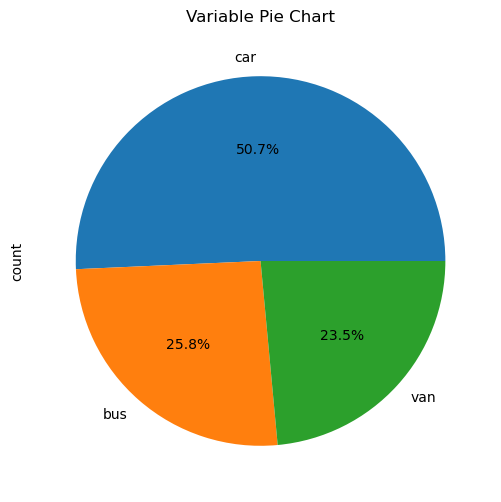

In [359]:
plt.figure(figsize=(7, 6))
df['class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Variable Pie Chart')
plt.show()

#### Check for duplicate rows in the data and impute with correct approach.

In [360]:
df.duplicated().sum()

0

### 2. Data Preparation:

#### A. Split data into X and Y. [Train and Test optional] 

In [361]:
X = df.drop('class', axis=1)  # Features
Y = df['class']  # Target variable

#### B. Standardize the Data 

In [362]:
# using z score to scale the features as we are not sure about the units of measurement

X_Scaled=X.apply(zscore)
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,5.879195e-16,1.000592,-2.512695,-0.811520,-0.082445,0.768143,3.076880
circularity,846.0,-4.073442e-16,1.000592,-1.929015,-0.787223,-0.134771,0.680795,2.311927
distance_circularity,846.0,3.695494e-16,1.000592,-2.671726,-0.766353,-0.131229,1.011995,1.901169
radius_ratio,846.0,-3.905465e-16,1.000592,-1.943141,-0.835616,-0.049871,0.780774,4.911546
pr.axis_aspect_ratio,846.0,3.275552e-16,1.000592,-1.863549,-0.594175,-0.086425,0.421324,9.687756
max.length_aspect_ratio,846.0,-1.637776e-16,1.000592,-1.428157,-0.340845,-0.123383,0.311542,10.097349
scatter_ratio,846.0,-1.091851e-16,1.000592,-1.715506,-0.660660,-0.359275,0.876403,2.895681
elongatedness,846.0,-4.367402e-16,1.000592,-1.911681,-1.015254,0.265356,0.649538,2.570453
pr.axis_rectangularity,846.0,-1.259828e-17,1.000592,-1.382277,-0.609882,-0.223684,0.934909,3.252095
max.length_rectangularity,846.0,8.272868e-16,1.000592,-2.067876,-0.758169,-0.137782,0.758332,2.757358


In [363]:
# Splitting the data into 80:20 train: test ratio

X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled, Y, test_size=0.2, random_state=42)

### 3. Model Building:

#### A. Train a base Classification model using SVM.

In [364]:
# Initialize the SVM classifier
svm_base_model = SVC()

# Train the SVM model 
svm_base_model.fit(X_train, Y_train)

SVC()

#### B. Print Classification metrics for train data. 

In [365]:
test_predictions = svm_base_model.predict(X_train)
print("Accuracy of the test data for svm base model : ",svm_base_model.score(X_train,Y_train))

Accuracy of the test data for svm base model :  0.9792899408284024


In [366]:
# Printing the evaluation metrics
print("Classification Report for Train Data:")
print(classification_report(Y_train, test_predictions))

Classification Report for Train Data:
              precision    recall  f1-score   support

         bus       0.98      0.98      0.98       166
         car       1.00      0.98      0.99       351
         van       0.94      0.99      0.96       159

    accuracy                           0.98       676
   macro avg       0.97      0.98      0.98       676
weighted avg       0.98      0.98      0.98       676



#### C. Apply PCA on the data with 10 components.

In [367]:
pca = PCA(n_components=10)
pca.fit(X_Scaled)

PCA(n_components=10)

#### D. Visualize Cumulative Variance Explained with Number of Components. 

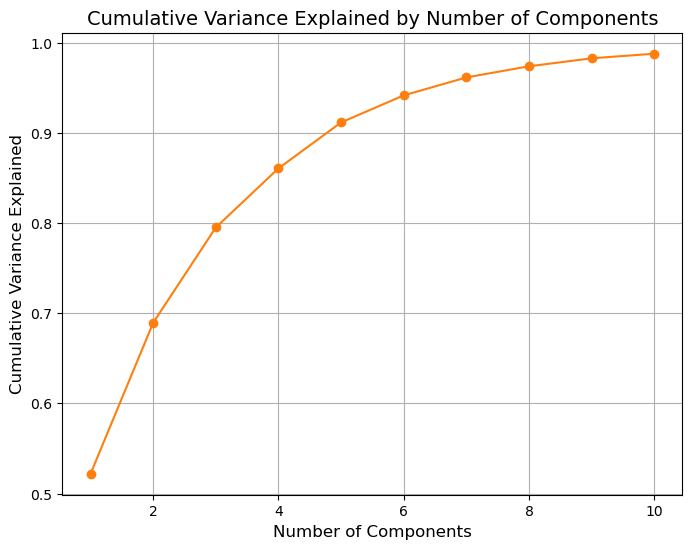

In [368]:
# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Define new color scheme
colors = plt.cm.tab10(range(len(cumulative_variance)))

# Plot the cumulative variance explained curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color=colors[1])
plt.title('Cumulative Variance Explained by Number of Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Variance Explained', fontsize=12)
plt.grid(True)
plt.show()

#### E. Draw a horizontal line on the above plot to highlight the threshold of 90%

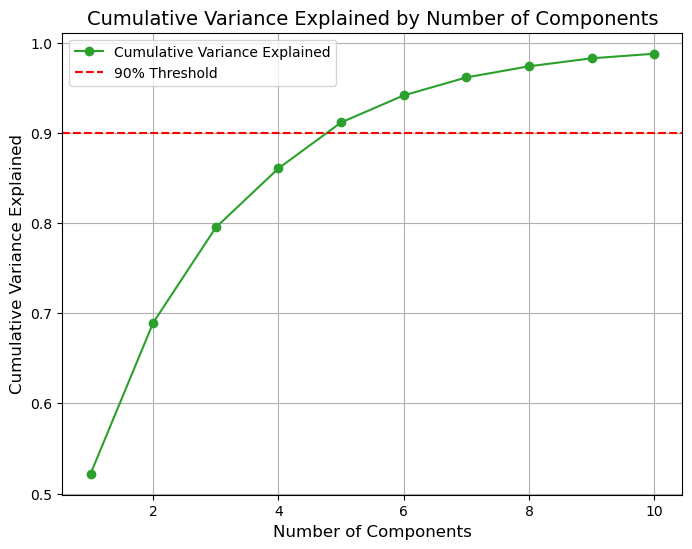

In [369]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color=colors[2], label='Cumulative Variance Explained')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.title('Cumulative Variance Explained by Number of Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Variance Explained', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

#### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.



In [370]:
# Determine the min number of components for 90% variance explained
min_components = np.argmax(cumulative_variance >= 0.9) + 1

# Apply PCA with the determined number of components
pca2 = PCA(n_components=min_components)
pca2.fit(X_train)

PCA(n_components=5)

In [371]:
transformed_pca2 = pca2.transform(X_train)


#### G. Train SVM model on components selected from above step

In [372]:
# Initialize the SVM model
svm_model = SVC()

# Fit the SVM model on the transformed data
svm_model.fit(transformed_pca2, Y_train)

SVC()

#### H. Print Classification metrics for train data of above model and share insights

In [373]:
test_predictions = svm_model.predict(transformed_pca2)
print("Accuracy of the test data for svm base model : ",svm_model.score(transformed_pca2,Y_train))

Accuracy of the test data for svm base model :  0.8121301775147929


In [374]:
# Printing the evaluation metrics
print("Classification Report for Train Data:")
print(classification_report(Y_train, test_predictions))

Classification Report for Train Data:
              precision    recall  f1-score   support

         bus       0.85      0.70      0.77       166
         car       0.85      0.89      0.87       351
         van       0.70      0.77      0.73       159

    accuracy                           0.81       676
   macro avg       0.80      0.78      0.79       676
weighted avg       0.82      0.81      0.81       676



#### Performance Analysis by Class:

"Bus" Class Evaluation:

Precision: 0.85

Recall: 0.70

F1-score: 0.77

Observation: The model struggles to accurately identify all instances of the "bus" class, as indicated by its lower recall compared to precision. This suggests potential misclassifications and opportunities for improvement.

"Car" Class Evaluation:

Precision: 0.85

Recall: 0.89

F1-score: 0.87

Observation: The model demonstrates balanced performance in accurately classifying "car" instances, with high precision and recall.

"Van" Class Evaluation:

Precision: 0.70

Recall: 0.77

F1-score: 0.73

Observation: Performance for the "van" class falls between "bus" and "car" classes, indicating moderate precision and recall.

#### Overall Model Evaluation:

Accuracy: 81%

Observation: The model demonstrates satisfactory overall performance. However, enhancements are needed, particularly in accurately detecting the "bus" and "van" class.

### 4. Performance Improvement:

#### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. 

In [375]:
# hyperparameter tuning for SVM model

c=[ 0.01, 0.1, 1,10]  # Range of C values
kernels=['linear','rbf','sigmoid','poly']  # Range of kernels
best_score = -1  # Initialize best score
best_params = {}  # Initialize best parameters

for kernel in kernels:
    for c_value in c:
        svm_classifier = SVC(C=c_value, kernel=kernel)
        svm_classifier.fit(transformed_pca2, Y_train)
        score = svm_classifier.score(transformed_pca2, Y_train)
        print(f'C={c_value:.2f}, Kernel={kernel}, Score={score:.4f}')
        
        if score > best_score:
            best_score = score
            best_params = {'C': c_value, 'kernel': kernel}

print("\nBest parameters:", best_params)
print("Best Accuracy:", best_score)  

C=0.01, Kernel=linear, Score=0.6568
C=0.10, Kernel=linear, Score=0.6879
C=1.00, Kernel=linear, Score=0.6864
C=10.00, Kernel=linear, Score=0.6849
C=0.01, Kernel=rbf, Score=0.5192
C=0.10, Kernel=rbf, Score=0.6982
C=1.00, Kernel=rbf, Score=0.8121
C=10.00, Kernel=rbf, Score=0.8728
C=0.01, Kernel=sigmoid, Score=0.5192
C=0.10, Kernel=sigmoid, Score=0.5858
C=1.00, Kernel=sigmoid, Score=0.5414
C=10.00, Kernel=sigmoid, Score=0.5074
C=0.01, Kernel=poly, Score=0.5399
C=0.10, Kernel=poly, Score=0.5725
C=1.00, Kernel=poly, Score=0.6553
C=10.00, Kernel=poly, Score=0.7470

Best parameters: {'C': 10, 'kernel': 'rbf'}
Best Accuracy: 0.8727810650887574


In [376]:
# Classification result for the best SVM model

test_predictions = svm_classifier.predict(transformed_pca2)
svm_best_model = SVC(C=10,kernel='rbf')
svm_best_model.fit(transformed_pca2, Y_train)
test_predictions = svm_best_model.predict(transformed_pca2)
print("Classification Report")
print(classification_report(Y_train, test_predictions))

Classification Report
              precision    recall  f1-score   support

         bus       0.87      0.83      0.85       166
         car       0.91      0.91      0.91       351
         van       0.80      0.83      0.81       159

    accuracy                           0.87       676
   macro avg       0.86      0.86      0.86       676
weighted avg       0.87      0.87      0.87       676



#### Before Hyperparameter Tuning:

Precision: The precision for the "bus", "car", and "van" classes was 0.85, 0.85, and 0.70, respectively. This indicates the accuracy of positive predictions.
Recall: The recall for the "bus", "car", and "van" classes was 0.70, 0.89, and 0.77, respectively. This measures the ability to identify the positive class correctly.
F1-score: The F1-score for the "bus", "car", and "van" classes was 0.77, 0.87, and 0.73, respectively. This is the harmonic mean of precision and recall, providing a balance between the two.
Accuracy: The overall accuracy was 81%, indicating the percentage of correctly classified instances out of the total instances.
Macro Average: Precision: 0.80, Recall: 0.78, F1-score: 0.79. Macro average calculates the metric independently for each class and then takes the average.
Weighted Average: Precision: 0.82, Recall: 0.81, F1-score: 0.81. Weighted average calculates the metric for each class and weights it by the number of true instances in each class.

#### After Hyperparameter Tuning:

Precision: Improved to 0.87 for "bus", 0.91 for "car", and 0.80 for "van" classes, indicating more accurate positive predictions.
Recall: Increased to 0.83 for "bus", 0.91 for "car", and 0.83 for "van" classes, showing better identification of positive instances.
F1-score: Enhanced to 0.85 for "bus", 0.91 for "car", and 0.81 for "van" classes, achieving a better balance between precision and recall.
Accuracy: Increased to 87%, indicating a significant improvement in overall model correctness.
Macro Average: Precision: 0.86, Recall: 0.86, F1-score: 0.86. Significant improvements were observed across precision, recall, and F1-score.
Weighted Average: Precision: 0.87, Recall: 0.87, F1-score: 0.87. Substantial enhancements were seen in precision, recall, and F1-score after hyperparameter tuning.


In summary, hyperparameter tuning resulted in substantial improvements in precision, recall, F1-score, and accuracy across all classes, leading to a significantly enhanced overall model performance

### 5. Data Understanding & Cleaning:

#### A. Explain pre-requisite/assumptions of PCA.

1. Linearity Assumption: PCA operates under the assumption that the relationships between the geometric features derived from vehicle silhouettes are linear. It seeks to identify and capture linear correlations among these features.

2. Centering Data: Prior to PCA application, it's advisable to center the features around their means. This process facilitates the accurate capture of variance and aligns the data points more effectively in the feature space.

3. Variance Importance: PCA prioritizes features with higher variance as they tend to encapsulate more meaningful information about distinctions between vehicle silhouettes. It endeavors to retain principal components that explain the most variance in the dataset.

4. Orthogonal Components: PCA produces orthogonal principal components, implying that the geometric features are uncorrelated in the new principal component space.

5. Significance of Non-Zero Variance: Principal components exhibiting non-zero variance play a crucial role in capturing significant variation within the vehicle silhouettes. Those with near-zero variance represent directions with minimal variability and are typically disregarded.

6. Data Distribution Consideration: PCA assumes that the geometric features exhibit an approximately elliptical distribution in the original feature space. Any deviations such as skewness or non-linear patterns may impact the efficacy of PCA.

7. Dataset Dimensionality: PCA can be applied to datasets containing geometric features of vehicle silhouettes. Although applicable to datasets of varying sizes, the dimensionality of the dataset influences result interpretation and significance.

8. Eigenvalues and Eigenvectors Computation: PCA relies on computing eigenvalues and eigenvectors of the covariance matrix of geometric features. This assumes numerical stability and the well-behaved nature of the covariance matrix during computation.



#### B. Explain advantages and limitations of PCA. 

#### Advantages:

1. Feature Engineering: PCA facilitates feature engineering by transforming original features into a new set of uncorrelated variables, potentially enhancing model performance.

2. Enhanced Model Generalization: By reducing dimensionality and focusing on the most informative components, PCA can improve the generalization ability of machine learning models.

3. Preprocessing Aid: PCA serves as a preprocessing step that simplifies data representation, making subsequent analysis and modeling tasks more efficient.

4. Dimensionality Interpretation: Principal components offer a concise representation of data variation, aiding in the identification of underlying structures and patterns.

#### Disadvantages:

1. Loss of Local Structure: PCA may obscure local structures within the data, particularly when dimensionality reduction results in a significant loss of information.

2. Assumption of Gaussian Distribution: PCA assumes a Gaussian distribution of data, which may not hold true for all datasets and can lead to suboptimal results.

3. Data Linearity Dependence: PCA's effectiveness heavily relies on the linearity assumption, limiting its ability to capture complex nonlinear relationships in the data.

4. Sensitive to Outliers: Outliers can distort the principal components and impact the interpretation of results, necessitating careful preprocessing to mitigate their influence.

5. Potential Bias Towards Large Variances: PCA tends to prioritize variables with larger variances, potentially overlooking informative but low-variance features.

6. Complexity in Interpreting Principal Components: Interpreting the meaning of principal components in real-world terms can be challenging, particularly when they represent linear combinations of original features.

7. Impact of Feature Scaling: PCA outcomes can be sensitive to variations in feature scales, requiring careful normalization or standardization to ensure robust results.

8. Subject to Dimensionality Curse: In very high-dimensional datasets, PCA may struggle to capture the most relevant information, leading to computational challenges and reduced effectiveness.





